# IS622 Wk 14 Discussion
Aaron Palumbo | Nov. 28, 2015

## Dependencies

In [13]:
from pyspark.sql import SQLContext, Row

import pandas as pd
import numpy as np

from IPython import display as dis

sqlContext = SQLContext(sc)

## Data

Let's load the graph from Figure 10.2 (MMDS)

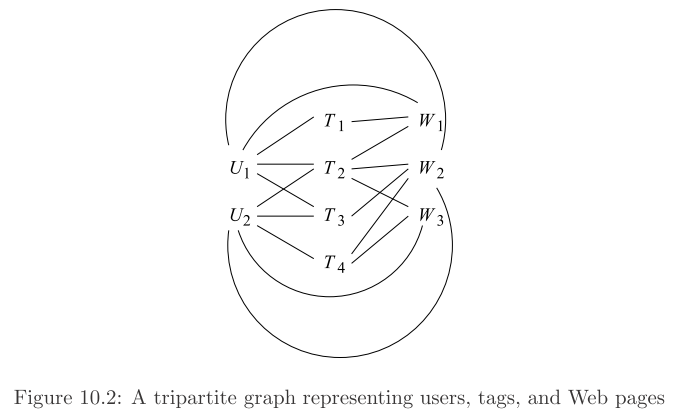

In [14]:
dis.Image("10-2.png", width=650)

In [15]:
# Edge list
E = pd.DataFrame(
    np.array([
        ["T1", "U1"],
        ["T1", "W1"],
        ["T2", "U1"],
        ["T2", "U2"],
        ["T2", "W1"],
        ["T2", "W2"],
        ["T2", "W3"],
        ["T3", "U1"],
        ["T3", "U2"],
        ["T3", "W2"],
        ["T4", "U2"],
        ["T4", "W2"],
        ["T4", "W3"],
        ["U1", "W1"],
        ["U1", "W2"],
        ["U2", "W2"],
        ["U2", "W3"]
    ])
)

E.columns = ["A", "B"]

In [16]:
# Convert E to Spark RDD
E.columns = ["X", "Y"]
rddE1 = sqlContext.createDataFrame(E)

E.columns = ["Y", "Z1"]
rddE2 = sqlContext.createDataFrame(E)

E.columns = ["X", "Z2"]
rddE3 = sqlContext.createDataFrame(E)

## Count Triangles

In [17]:
sdf = rddE1.join(rddE2, on=["Y"]).join(rddE3, on=["X"]).filter("Z1 = Z2")

In [18]:
pdf = sdf.toPandas()
pdf = pdf[["X", "Y", "Z1"]]
pdf.columns = ["i", "j", "k"]
pdf

,i,j,k
0,T1,U1,W1
1,T2,U1,W1
2,T2,U1,W2
3,T2,U2,W2
4,T3,U1,W2
5,T3,U2,W2
6,T4,U2,W2
7,T2,U2,W3
8,T4,U2,W3


## Performance

In [19]:
%%timeit
sdf = rddE1.join(rddE2, on=["Y"]).join(rddE3, on=["X"]).filter("Z1 = Z2")
del sdf

100 loops, best of 3: 12.1 ms per loop
